### Task: Measures of central tendency & measures of spread

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C://Users//navs9//Downloads//house_price.xlsx")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB


In [4]:
df.dtypes

location           object
size               object
total_sqft        float64
bath                int64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Method 1: Using Mean Function

In [7]:
#mean
df.price_per_sqft.mean()

7920.336742424242

In [8]:
#median
df.price_per_sqft.median()

5438.0

In [ ]:
# There is considerable difference between mean and median, which shows the existence of outliers

<Axes: xlabel='price_per_sqft'>

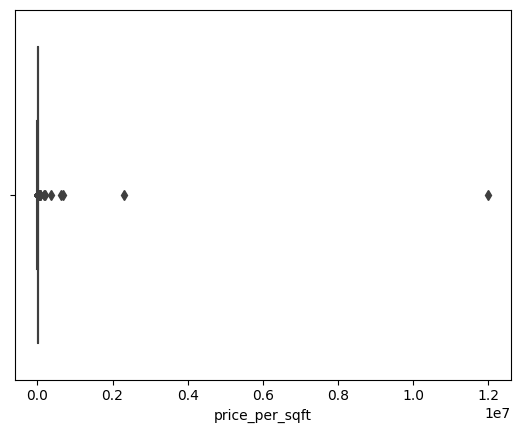

In [9]:
# box plot
sns.boxplot(x='price_per_sqft',data=df)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

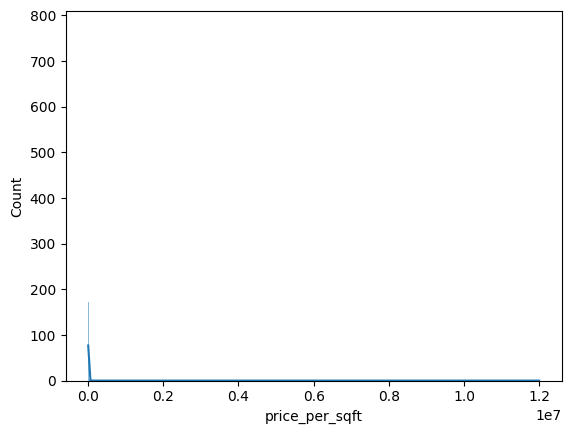

In [25]:
# histogram to check normal distribution
sns.histplot(df['price_per_sqft'], kde = True)

### Method 2: Percentile method

In [14]:
q1 = np.percentile(df['price_per_sqft'], 25)
q3 = np.percentile(df['price_per_sqft'], 75)
#quantile function can also instead of percentile
lower_bound = q1 
upper_bound = q3

In [17]:
lower_bound

4267.0

In [18]:
upper_bound

7317.0

In [19]:
df1=df[(df['price_per_sqft']<upper_bound)&(df['price_per_sqft']>lower_bound)]
#df1 is new data frame after removing outliers
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
8,Marathahalli,3 BHK,1310.0,3,63.25,3,4828
14,Sarjapur,3 Bedroom,2250.0,3,148.00,3,6577
...,...,...,...,...,...,...,...
13189,Yeshwanthpur,3 BHK,1675.0,3,92.13,3,5500
13190,Rachenahalli,2 BHK,1050.0,2,52.71,2,5020
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689


In [20]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,6597.000000,6597.000000,6597.000000,6597.000000,6597.000000
mean,1471.603837,2.467182,82.442669,2.565712,5537.410793
std,874.019451,0.942571,55.108567,0.893915,828.645177
min,300.000000,1.000000,16.000000,1.000000,4268.000000
25%,1115.000000,2.000000,56.725000,2.000000,4847.000000
50%,1295.000000,2.000000,71.500000,2.000000,5438.000000
75%,1635.000000,3.000000,93.000000,3.000000,6189.000000
max,30400.000000,16.000000,2100.000000,16.000000,7314.000000


In [21]:
#median
df1.price_per_sqft.median()

5438.0

In [22]:
# the difference between mean and median is reduced significantly. Outliers are also reduced

<Axes: xlabel='price_per_sqft'>

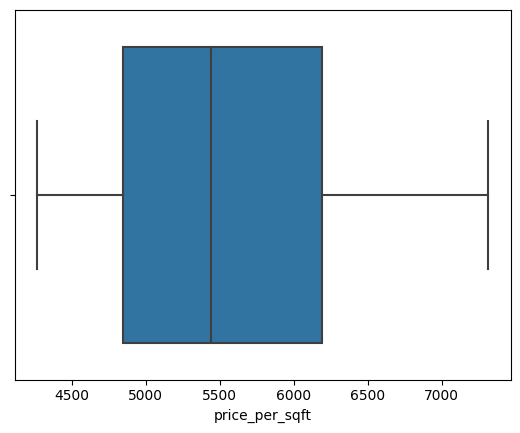

In [23]:
# box plot
sns.boxplot(x='price_per_sqft',data=df1)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

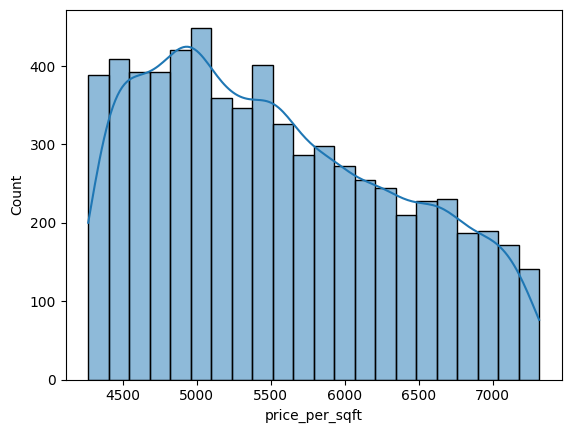

In [24]:
# histogram to check normal distribution
sns.histplot(df1['price_per_sqft'], kde = True)

### Method 3 IQR(Inter quartile range method) 

In [26]:
iqr = q3 - q1
iqr_lower_bound = q1 - (1.5 * iqr)
iqr_upper_bound = q3 + (1.5 * iqr)

In [27]:
iqr

3050.0

In [29]:
df2=df[(df['price_per_sqft']<iqr_upper_bound)&(df['price_per_sqft']>iqr_lower_bound)]
#df2 is new data frame after removing outliers
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [30]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000
mean,1514.629659,2.533641,87.654926,2.644826,5575.925513
std,1195.959790,1.111145,73.154677,1.051124,1957.779783
min,276.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,48.000000,2.000000,4166.000000
50%,1270.000000,2.000000,66.780000,2.000000,5188.000000
75%,1634.500000,3.000000,100.000000,3.000000,6603.000000
max,52272.000000,27.000000,2100.000000,27.000000,11875.000000


In [31]:
#median
df2.price_per_sqft.median()

5188.0

In [ ]:
# the difference between mean and median is reduced significantly. Outliers are also reduced

<Axes: xlabel='price_per_sqft'>

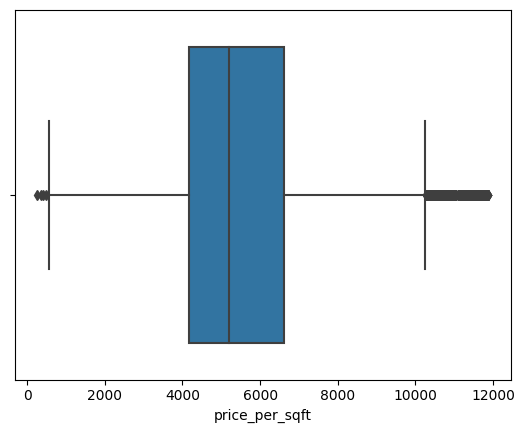

In [32]:
# box plot
sns.boxplot(x='price_per_sqft',data=df2)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

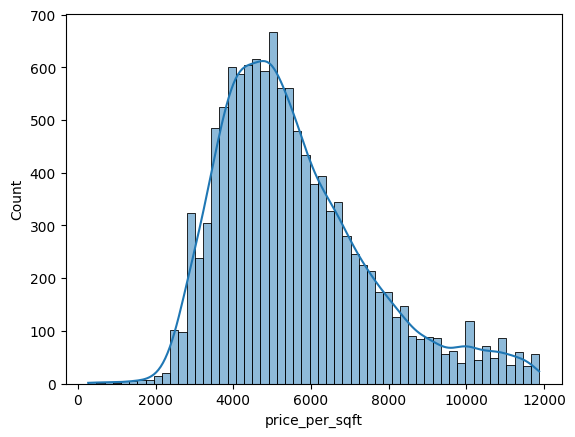

In [33]:
# histogram to check normal distribution
sns.histplot(df2['price_per_sqft'], kde = True)

In [34]:
#much more normally distributed bell curve is found here

### Method 4: Normal distribution

In [35]:
#mean
df.price_per_sqft.mean()

7920.336742424242

In [36]:
#standard deviation
df.price_per_sqft.std()

106727.16032810867

In [37]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [39]:
#finding data in + & - 3 times standard deviation
plus_sd = df.price_per_sqft.mean() + (3*df.price_per_sqft.std())
minus_sd = df.price_per_sqft.mean() - (3*df.price_per_sqft.std())

In [40]:
print(plus_sd)
print(minus_sd)

328101.8177267502
-312261.14424190175


In [41]:
df3=df[(df['price_per_sqft']<plus_sd)&(df['price_per_sqft']>minus_sd)]
#df3 is new data frame after removing outliers and within + & - 3 times standard deviation
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [42]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13195.000000,13195.00000,13195.000000,13195.000000,13195.000000
mean,1555.884482,2.69064,112.267415,2.800152,6713.708602
std,1237.196807,1.33853,149.200669,1.292344,4876.727718
min,15.000000,1.00000,8.000000,1.000000,267.000000
25%,1100.000000,2.00000,50.000000,2.000000,4266.500000
50%,1275.000000,2.00000,71.740000,3.000000,5434.000000
75%,1672.500000,3.00000,120.000000,3.000000,7313.000000
max,52272.000000,40.00000,3600.000000,43.000000,200000.000000


In [43]:
df3.price_per_sqft.median()

5434.0

<Axes: xlabel='price_per_sqft'>

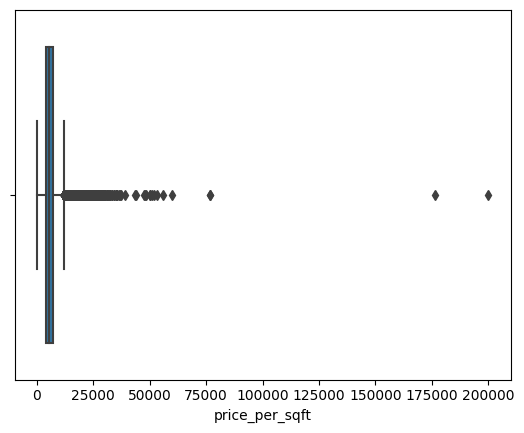

In [44]:
# box plot
sns.boxplot(x='price_per_sqft',data=df3)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

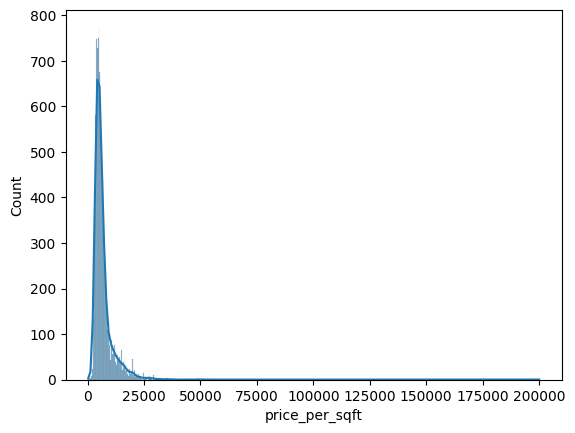

In [46]:
# histogram to check normal distribution
sns.histplot(df3['price_per_sqft'], kde = True)

In [ ]:
#even though some outliers are removed a normal distribution bell shape curve is not found

### Method 5: Zscore method

In [49]:
df4 = pd.read_excel("C://Users//navs9//Downloads//house_price.xlsx")
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [50]:
#mean
m=df4.price_per_sqft.mean()
#standard deviation
s=df4.price_per_sqft.std()
df4['z_score'] = (df4['price_per_sqft'] - m)/s
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.023299


In [54]:
#selecting data whos z score is between -3 and 3
df5=df4[(df4['z_score']<3)&(df4['z_score']>-3)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.023299


In [55]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft,z_score
count,13195.000000,13195.00000,13195.000000,13195.000000,13195.000000,13195.000000
mean,1555.884482,2.69064,112.267415,2.800152,6713.708602,-0.011306
std,1237.196807,1.33853,149.200669,1.292344,4876.727718,0.045693
min,15.000000,1.00000,8.000000,1.000000,267.000000,-0.071709
25%,1100.000000,2.00000,50.000000,2.000000,4266.500000,-0.034235
50%,1275.000000,2.00000,71.740000,3.000000,5434.000000,-0.023296
75%,1672.500000,3.00000,120.000000,3.000000,7313.000000,-0.005691
max,52272.000000,40.00000,3600.000000,43.000000,200000.000000,1.799726


In [56]:
df5.price_per_sqft.median()

5434.0

<Axes: xlabel='price_per_sqft'>

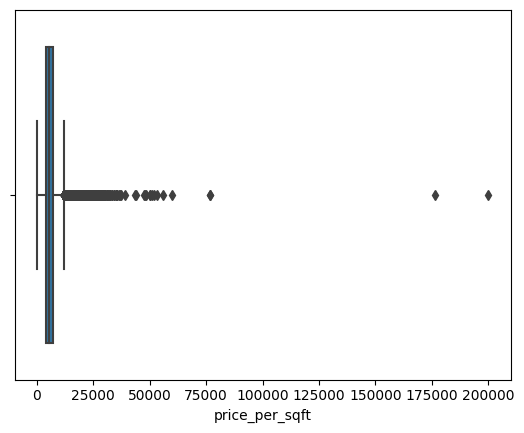

In [57]:
# box plot
sns.boxplot(x='price_per_sqft',data=df5)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

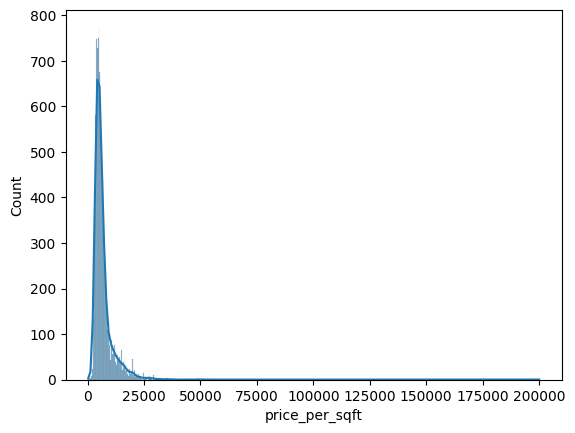

In [58]:
# histogram to check normal distribution
sns.histplot(df5['price_per_sqft'], kde = True)

###  Box plot for all the numerical columns

In [60]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [61]:
df.dtypes

location           object
size               object
total_sqft        float64
bath                int64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [62]:
# there are 5 numerical columns

<Axes: xlabel='total_sqft'>

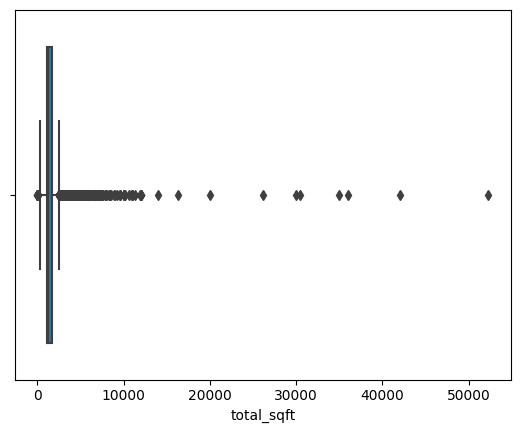

In [63]:
# total_sqft box plot
sns.boxplot(x='total_sqft',data=df)

<Axes: xlabel='bath'>

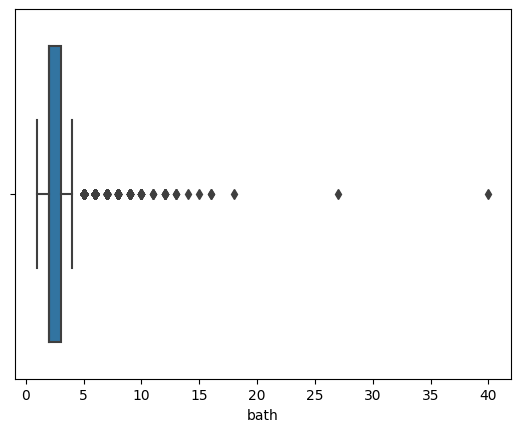

In [64]:
# bath box plot
sns.boxplot(x='bath',data=df)

<Axes: xlabel='price'>

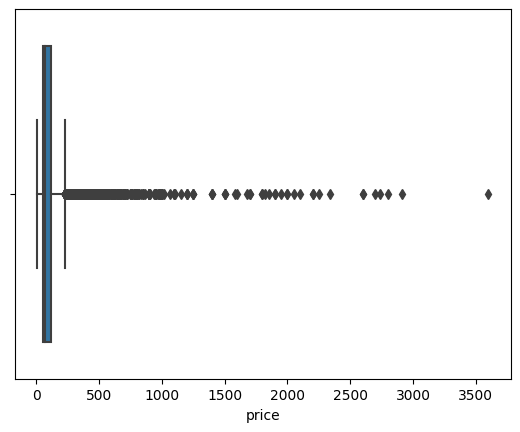

In [65]:
# price box plot
sns.boxplot(x='price',data=df)

<Axes: xlabel='bhk'>

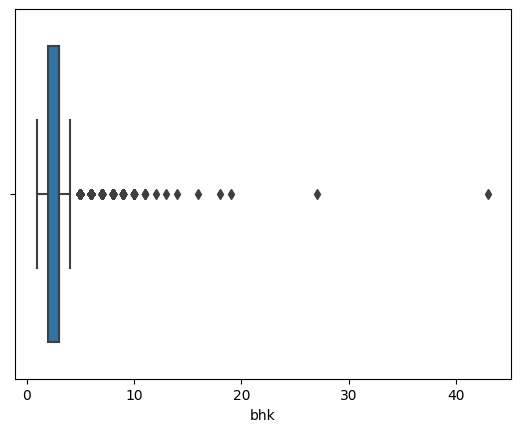

In [66]:
# bhk box plot
sns.boxplot(x='bhk',data=df)

<Axes: xlabel='price_per_sqft'>

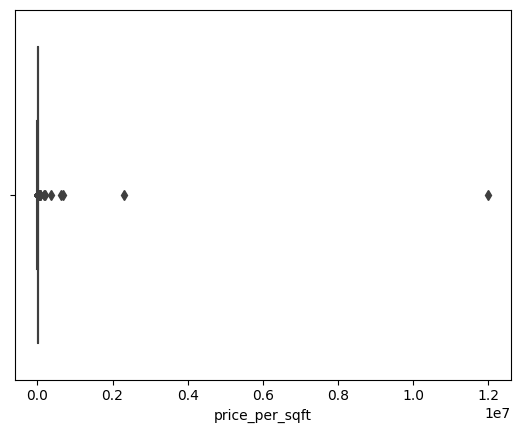

In [67]:
# price_per_sqft box plot
sns.boxplot(x='price_per_sqft',data=df)

### Scatter plots to check relation between numerical variables and finding correlation

In [68]:
df.dtypes

location           object
size               object
total_sqft        float64
bath                int64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

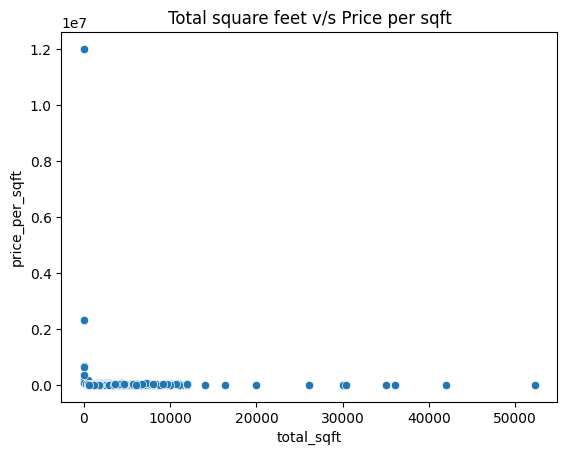

In [69]:
sns.scatterplot(x='total_sqft', y='price_per_sqft',data=df)
plt.title('Total square feet v/s Price per sqft')
plt.show()

In [70]:
#Finding correlation
correlation=df['total_sqft'].corr(df["price_per_sqft"])
print("The correlation between Total square feet and Price per sqft is",correlation)

The correlation between Total square feet and Price per sqft is -0.008266557358558852


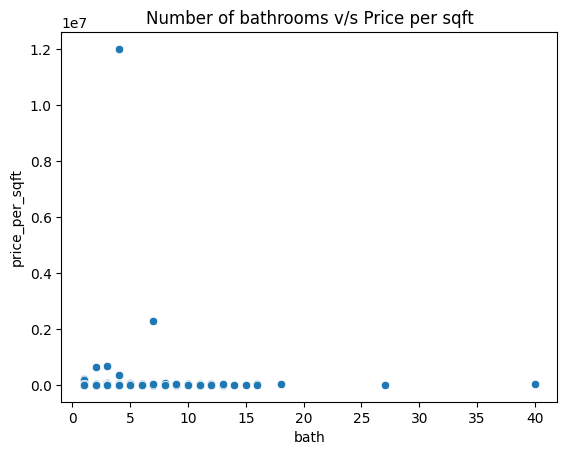

In [72]:
sns.scatterplot(x='bath', y='price_per_sqft',data=df)
plt.title('Number of bathrooms v/s Price per sqft')
plt.show()

In [73]:
#Finding correlation
correlation=df['bath'].corr(df["price_per_sqft"])
print("The correlation between Number of bathrooms and Price per sqft is",correlation)

The correlation between Number of bathrooms and Price per sqft is 0.030882850709493412


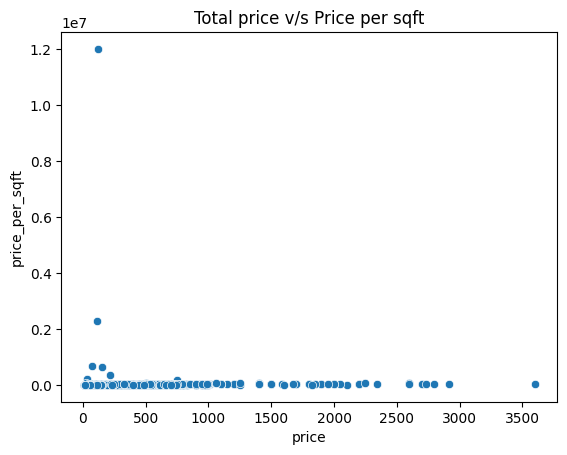

In [74]:
sns.scatterplot(x='price', y='price_per_sqft',data=df)
plt.title('Total price v/s Price per sqft')
plt.show()

In [75]:
#Finding correlation
correlation=df['price'].corr(df["price_per_sqft"])
print("The correlation between Total price and Price per sqft is",correlation)

The correlation between Total price and Price per sqft is 0.028386884636080346


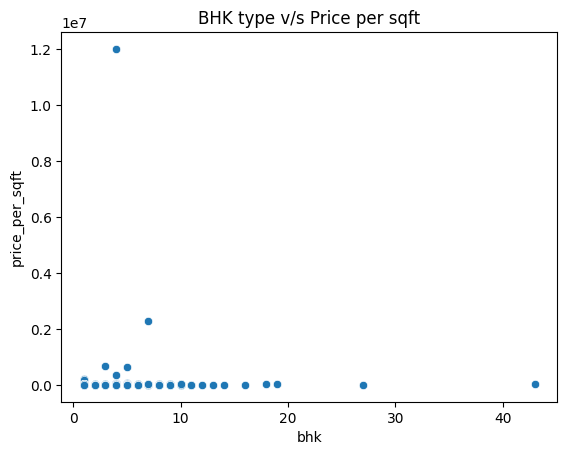

In [76]:
sns.scatterplot(x='bhk', y='price_per_sqft',data=df)
plt.title('BHK type v/s Price per sqft')
plt.show()

In [77]:
#Finding correlation
correlation=df['bhk'].corr(df["price_per_sqft"])
print("The correlation between BHK type and Price per sqft is",correlation)

The correlation between BHK type and Price per sqft is 0.030955085559642905


In [81]:
#summarising correlation
df_corr_table = pd.read_excel("C://Users//navs9//Downloads//house_price.xlsx")
df_corr_table.drop('location',axis=1,inplace=True)
df_corr_table.drop('size',axis=1,inplace=True)
df_corr_table.shape
corr_table = df_corr_table.corr()
corr_table

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


### Heatmap

<Axes: >

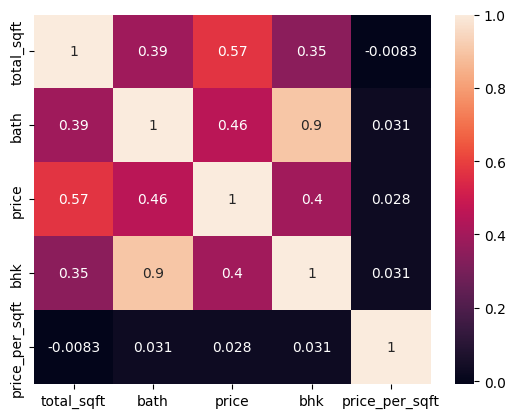

In [83]:
sns.heatmap(corr_table, annot=True)

### The End 